<a href="https://colab.research.google.com/github/iamharkirat/STP-540-Computational-Statistics/blob/main/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import time

from pylab import rcParams
rcParams['figure.figsize']=10,5
sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Functions

In [10]:
import numpy as np
from scipy.special import expit as logistic
from numpy.random import binomial


def simData(X, beta):
    """simulate y~Bernoulli(X beta)"""
    eta = X @ beta
    pvec = logistic(eta)
    y = binomial(n=1, p=pvec)
    return y


def phat(X, beta):
    """p(X beta)"""
    eta = X @ beta
    pvec = logistic(eta)
    return pvec


def mLL(X, y, beta):
    eta = X @ beta
    py1 = logistic(eta)
    return -np.sum(np.where(y==1, np.log(py1), np.log(1-py1)))/len(y)

def lgH(X, beta):
    eta = X @ beta
    pvec = logistic(eta)
    D = np.diag(pvec*(1-pvec))
    Hm = X.T @ D @ X / len(beta)
    return Hm

def mLL(X, y, beta):
    eta = X.dot(beta.reshape(-1, 1))
    py1 = 1/(1 + np.exp(-eta))
    n = len(y)
    return -np.sum(np.where(y == 1, np.log(py1), np.log(1 - py1))) / n

def lgGrad(X, y, beta):
    eta = X.dot(beta.reshape(-1, 1))
    pvec = 1/(1 + np.exp(-eta))
    gvec = X.T.dot(y - pvec)
    n = len(y)
    return -gvec/n

0.9309517906861541


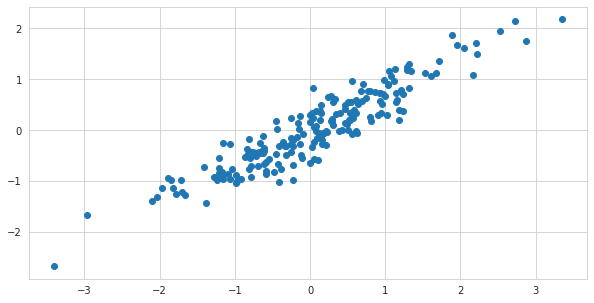

In [11]:
n = 200
beta = np.array([1, 2])
p = len(beta)

np.random.seed(17)
x1 = np.random.normal(size=n)
wht = 0.7
x2 = wht*x1 + (1-wht)*np.random.normal(size=n)
print(np.corrcoef(x1, x2)[0, 1])

X = np.column_stack((x1, x2))

def simData(X, beta):
    eta = np.dot(X, beta)
    p = 1 / (1 + np.exp(-eta))
    y = np.random.binomial(1, p)
    return y

y = simData(X, beta)

plt.scatter(x1, x2)
plt.show()

In [13]:
# create the dataframe
ddf = pd.DataFrame(np.column_stack([X,y]), columns=['x1', 'x2', 'y'])

# fit the logistic regression model
lgm = sm.Logit(ddf['y'], ddf[['x1', 'x2']]).fit(disp=0)

# print the summary
print(lgm.summary())

# extract the estimated coefficients
bhat = lgm.params.to_numpy().reshape(-1,1)

# print the gradient at the MLE
print("grad at mle: ", lgGrad(X, y, bhat))

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  200
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                            1
Date:                Wed, 22 Mar 2023   Pseudo R-squ.:                  0.5281
Time:                        03:02:57   Log-Likelihood:                -65.345
converged:                       True   LL-Null:                       -138.47
Covariance Type:            nonrobust   LLR p-value:                 1.145e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7792      0.602      1.294      0.196      -0.401       1.959
x2             3.3522      0.862      3.890      0.000       1.663       5.041
grad at mle:  [[0.31673292 0.37667929 0.31673292 0.3

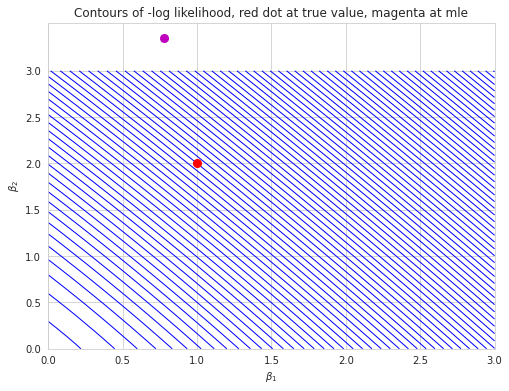

In [16]:
import numpy as np
import matplotlib.pyplot as plt

gs = 50  # one d grid size
alga1 = np.linspace(0, 3.0, num=gs)  # one d grid
alga2 = np.linspace(0, 3.0, num=gs)  # one d grid
alg2 = np.transpose([np.tile(alga1, len(alga2)), np.repeat(alga2, len(alga1))])  # two d grid

llv = np.zeros(len(alg2))
quadv = np.zeros(len(alg2))
linv = np.zeros(len(alg2))

for i in range(len(llv)):
    llv[i] = mLL(X, y, alg2[i, :])

# contour
llmat = llv.reshape((len(alga1), len(alga2)))
plt.figure(figsize=(8, 6))
plt.contour(alga1, alga2, llmat, levels=100, linewidths=1, colors='blue')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.xticks(np.arange(0, 3.1, 0.5))
plt.yticks(np.arange(0, 3.1, 0.5))
plt.plot(beta[0], beta[1], 'ro', markersize=8)  # true value
plt.plot(bhat[0], bhat[1], 'mo', markersize=8)  # mle
plt.title('Contours of -log likelihood, red dot at true value, magenta at mle', fontsize=12)
plt.show()

In [23]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def stochastic_gradient_descent(X, y, learning_rate, max_iterations):
    n, p = X.shape
    theta = np.zeros(p)
    w_hist = []
    
    for i in range(max_iterations):
        # randomly shuffle the data
        perm = np.random.permutation(n)
        X = X[perm]
        y = y[perm]
        
        for j in range(n):
            # compute the predicted probability
            p_hat = sigmoid(np.dot(X[j], theta))
            
            # update the gradient
            gradient = (y[j] - p_hat) * X[j]
            
            # update the parameter vector
            theta = theta + learning_rate * gradient
            
            # keep track of the parameter values
            w_hist.append(theta.copy())
            
    return theta, np.array(w_hist)

# generate a synthetic dataset with 3 features
X, y = make_classification(n_samples=1000, n_features=3, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# set the learning rate and maximum number of iterations
learning_rate = 0.01
max_iterations = 1000

# fit the logistic regression model using stochastic gradient descent
theta, w_hist = stochastic_gradient_descent(X_train, y_train, learning_rate, max_iterations)

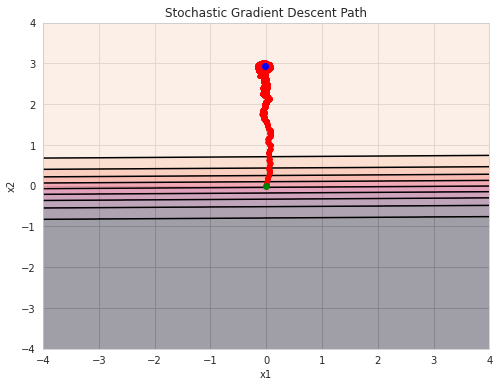

In [25]:
# define the range of values for x1 and x2
xx1, xx2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))

# add a column of ones to the feature matrix
X_grid = np.c_[np.ones(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]

# compute the predicted probabilities for each point in the grid
zz = sigmoid(np.dot(X_grid, theta.reshape(-1, 1)))
zz = zz.reshape(xx1.shape)

# plot the contour lines and the path taken by the stochastic gradient descent algorithm
plt.figure(figsize=(8,6))
plt.contourf(xx1, xx2, zz, alpha=0.4, levels=10)
plt.contour(xx1, xx2, zz, colors='black', levels=10)
plt.plot(w_hist[:,1], w_hist[:,2], 'o-', markersize=3, linewidth=1, color='red')
plt.plot(w_hist[0,1], w_hist[0,2], 'o', markersize=6, color='green')
plt.plot(w_hist[-1,1], w_hist[-1,2], 'o', markersize=6, color='blue')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Stochastic Gradient Descent Path')
plt.show()


In [ ]:
# Gradient Descent

# Iteration parameters
setup = 1

if setup == 1:
    niter = 100  # number of iterations
    lrat = np.array([5.0] * niter)  # learning rate

if setup == 2:
    niter = 100  # number of iterations
    lrat = np.array([40.0] * niter)  # learning rate

if setup == 3:
    niter = 50  # number of iterations
    lrat = np.array([35.0] * niter)  # learning rate

biter = np.array([1.2, 0.2])  # starting value

# store iterations of beta values
bM = np.zeros((niter + 1, len(biter)))
bM[0] = biter
lvv = np.zeros(niter + 1)
lambda_ = 0.0
lvv[0] = mLL(X, y, biter)

# iterate
for i in range(niter):
    gv = lgGrad(X, y, biter)
    biter = biter - lrat[i] * (gv + 2 * lambda_ * biter)
    lvv[i + 1] = mLL(X, y, biter)
    bM[i + 1] = biter

plt.plot(lvv)
plt.show()


ValueError: operands could not be broadcast together with shapes (2,200) (2,) 

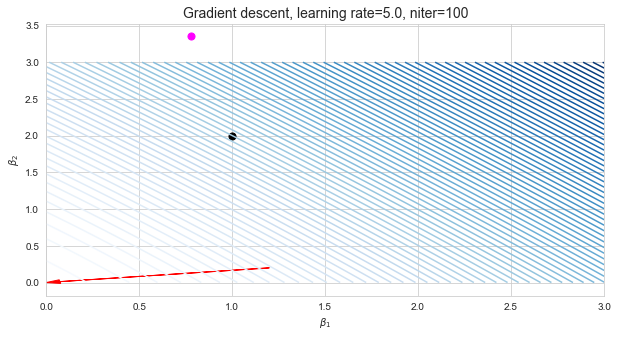

In [ ]:
llmat = np.array(llv).reshape(len(alga1), len(alga2))
plt.contour(alga1, alga2, llmat, levels=100, cmap='Blues')
plt.xlabel(r'$\beta_1$')
plt.ylabel(r'$\beta_2$')
plt.scatter(beta[0], beta[1], c='black', s=50, marker='o')
plt.scatter(bhat[0], bhat[1], c='magenta', s=50, marker='o')
tnm = f"Gradient descent, learning rate={lrat[0]}, niter={niter}"
plt.title(tnm, fontsize=14)

for i in range(1, niter + 1):
    plt.arrow(bM[i - 1, 0], bM[i - 1, 1], bM[i, 0] - bM[i - 1, 0],
              bM[i, 1] - bM[i - 1, 1], length_includes_head=True, head_width=.05, color='red')

plt.show()
